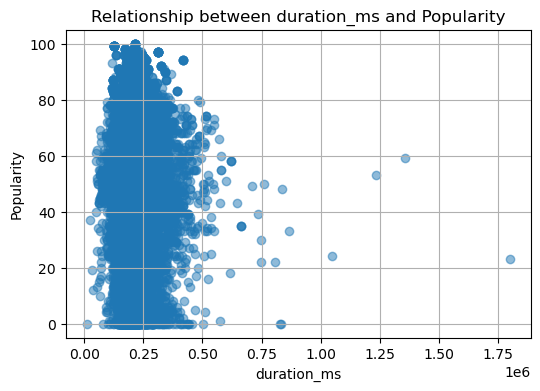

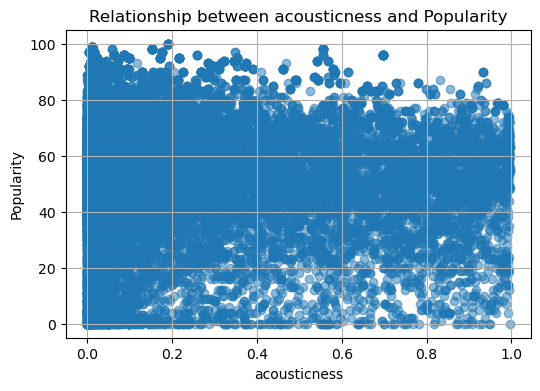

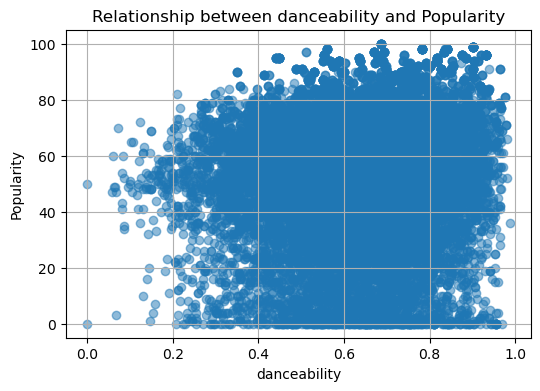

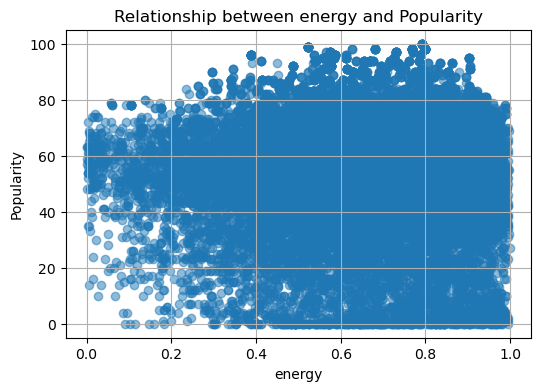

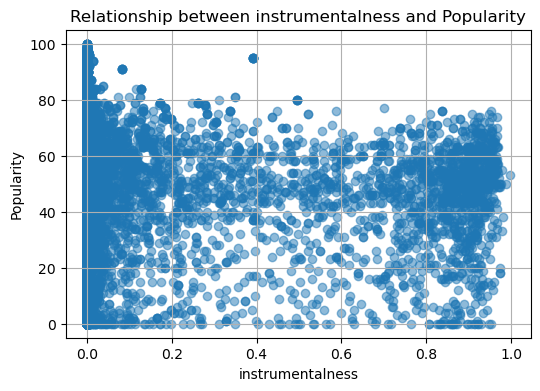

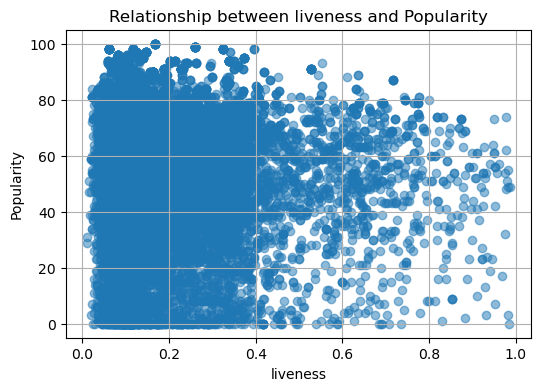

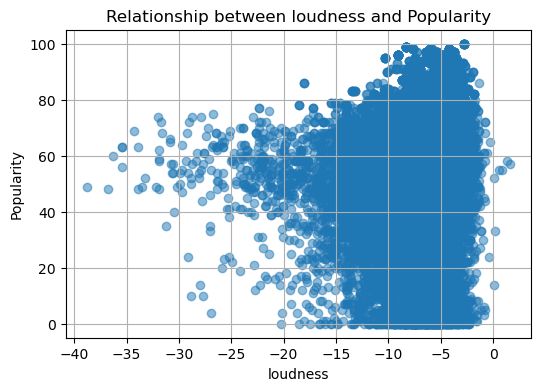

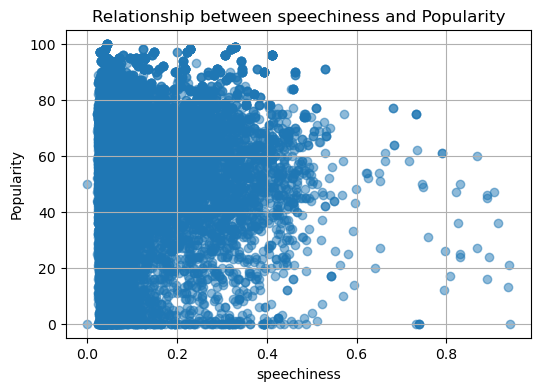

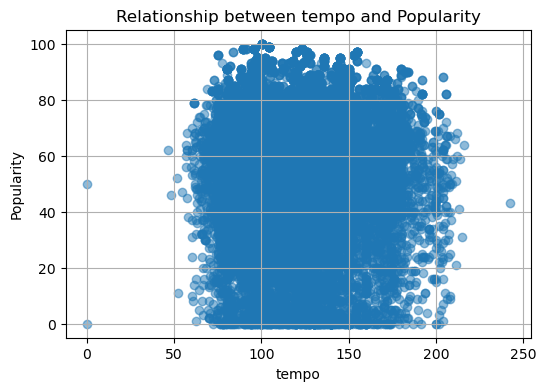

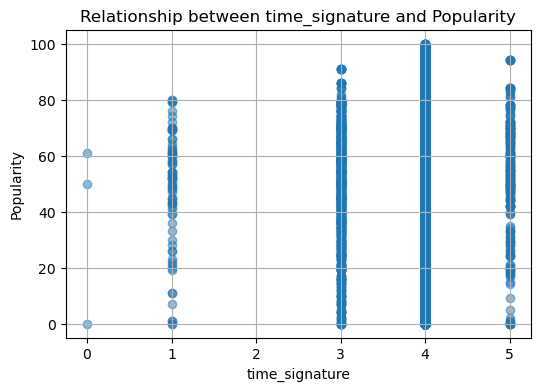

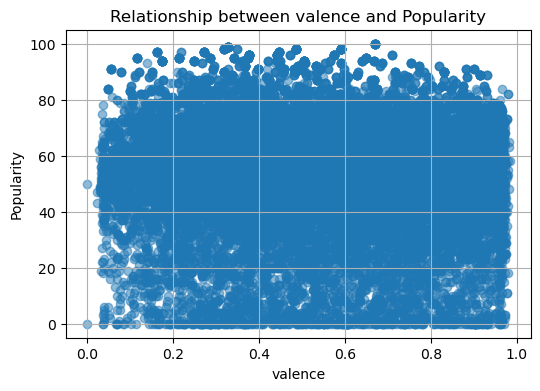

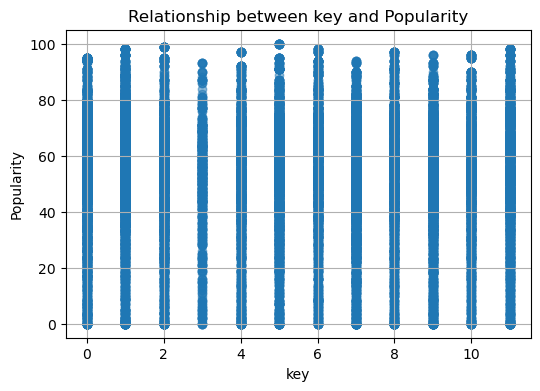

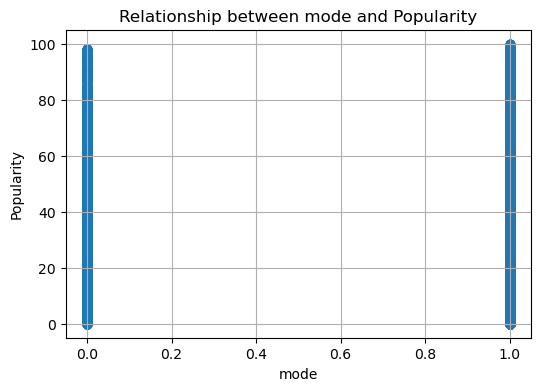

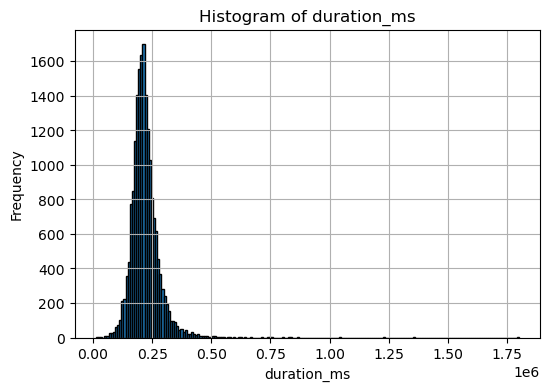

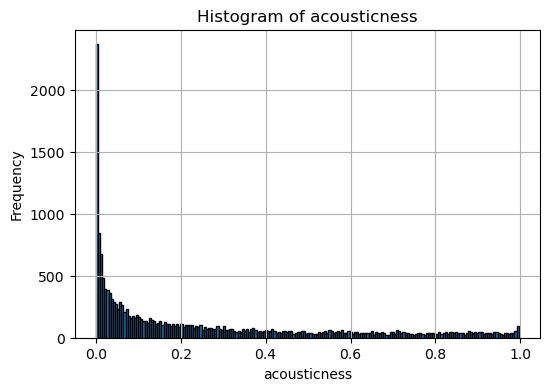

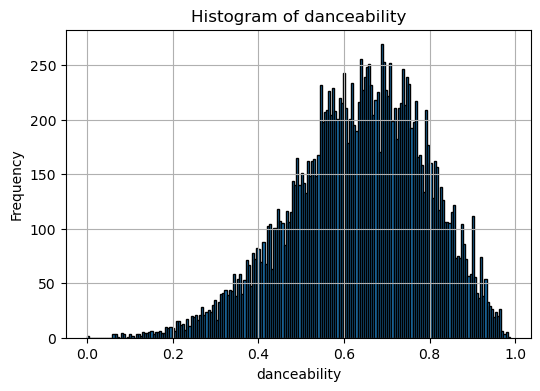

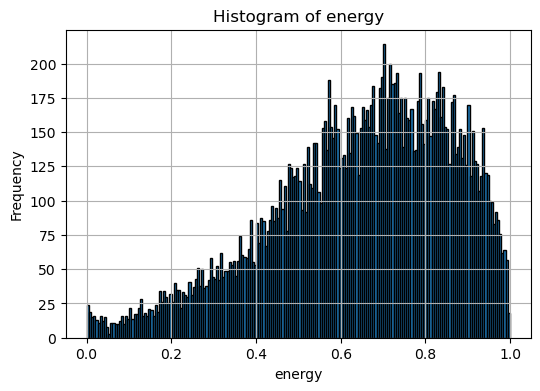

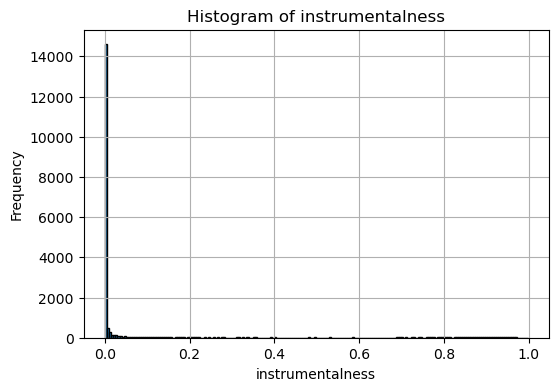

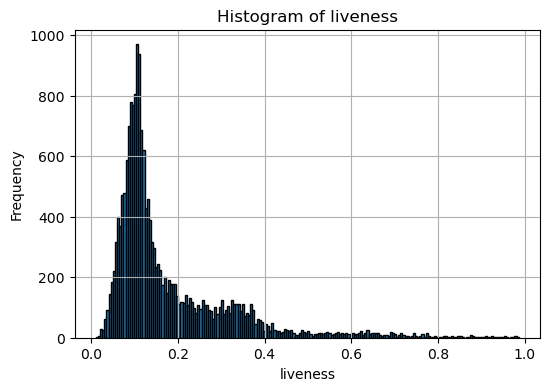

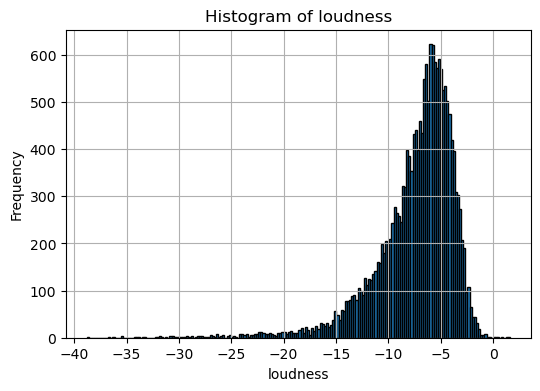

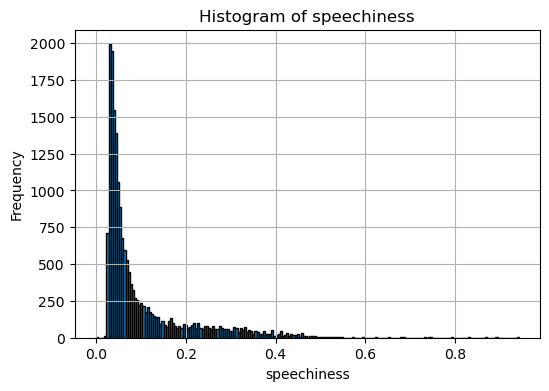

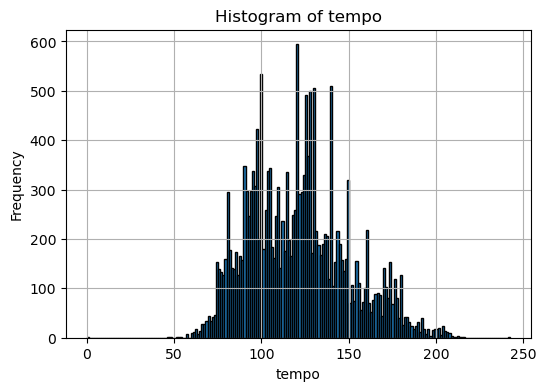

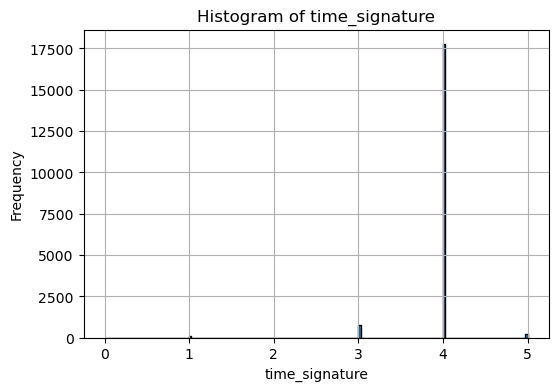

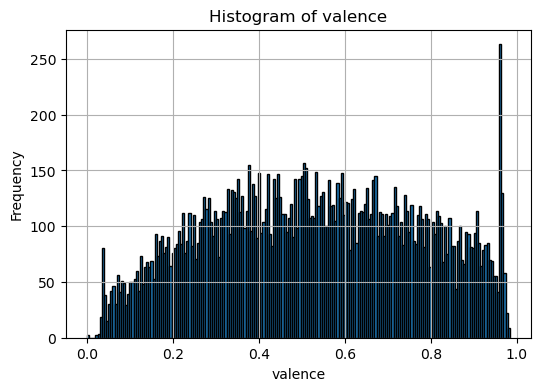

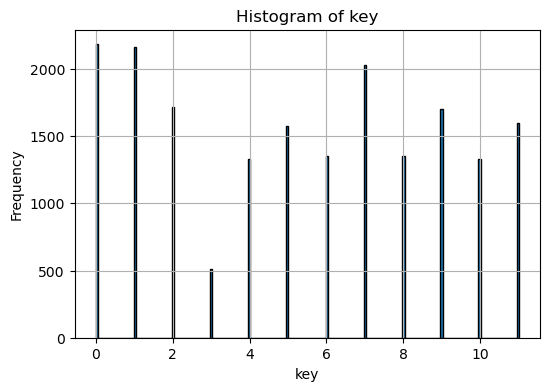

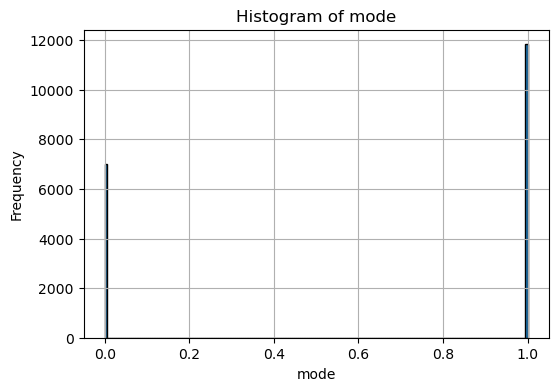

C:\Users\Jmmurphy\AppData\Local\Temp\ipykernel_15492\1265754494.py:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='cool')


<Axes: >

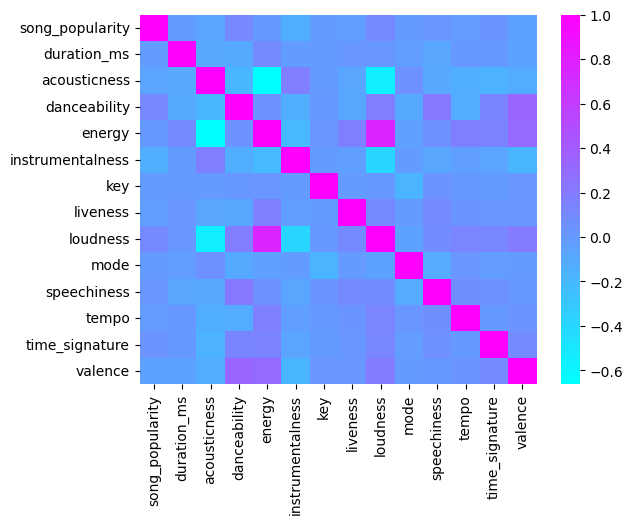

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv('song_data.csv', delimiter=',')

# Define the features and the target variable
features = ['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness',
           'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence', 'key', 'mode'] 

label = data['song_popularity']

train_data, test_data, train_label, test_label = train_test_split(data[features], label, test_size=0.2, random_state=42)

# Scatter plots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
fig.suptitle('Relationship between Features and Popularity', y=1.02)

for i, feature in enumerate(features):
    row, col = divmod(i, 5)
    axes[row, col].scatter(data[feature], label, alpha=0.5)
    axes[row, col].set_title(f'{feature} vs Popularity')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Popularity')
    axes[row, col].grid(True)

plt.tight_layout()

# Histograms
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
fig.suptitle('Histograms of Features', y=1.02)

for i, feature in enumerate(features):
    row, col = divmod(i, 5)
    data[feature].hist(bins=200, edgecolor='black', ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True)

plt.tight_layout()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='cool', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [2]:
# RMSE Dictionary
RMSE_Dictionary = {}

In [3]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Root Mean Squared Error (RMSE): 21.48576103236179


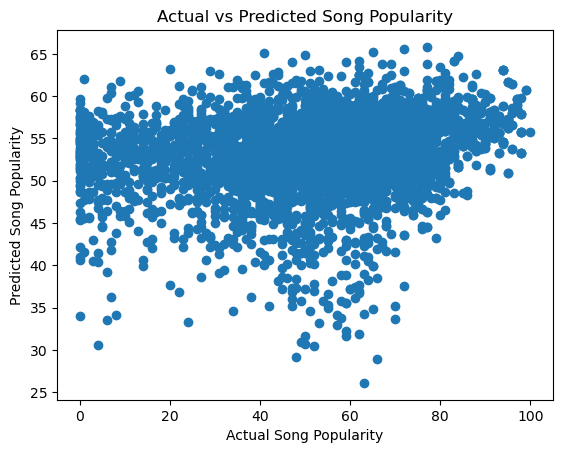

In [4]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(train_data, train_label)

# Make predictions on the test set
predictions = model.predict(test_data)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_label, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')
RMSE_Dictionary['Linear'] = rmse

# Plot actual vs predicted values
plt.scatter(test_label, predictions)
plt.xlabel('Actual Song Popularity')
plt.ylabel('Predicted Song Popularity')
plt.title('Actual vs Predicted Song Popularity')
plt.show()

In [5]:
# Ridge Model
from sklearn.linear_model import Ridge

Root Mean Squared Error (RMSE): 21.48561533972439


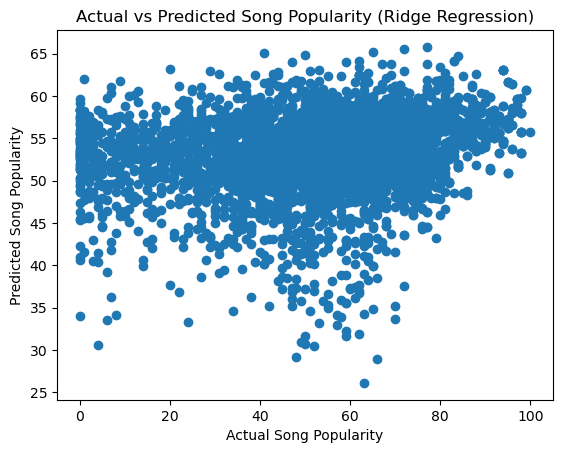

In [6]:
# Create and train the Ridge regression model
alpha = 1.0 
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(train_data, train_label)

# Make predictions on the test set
predictions = ridge_model.predict(test_data)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_label, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')
RMSE_Dictionary['Ridge'] = rmse

# Plot actual vs predicted values
plt.scatter(test_label, predictions)
plt.xlabel('Actual Song Popularity')
plt.ylabel('Predicted Song Popularity')
plt.title('Actual vs Predicted Song Popularity (Ridge Regression)')
plt.show()

In [20]:
# Include Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Root Mean Squared Error (RMSE): 21.044685309481604


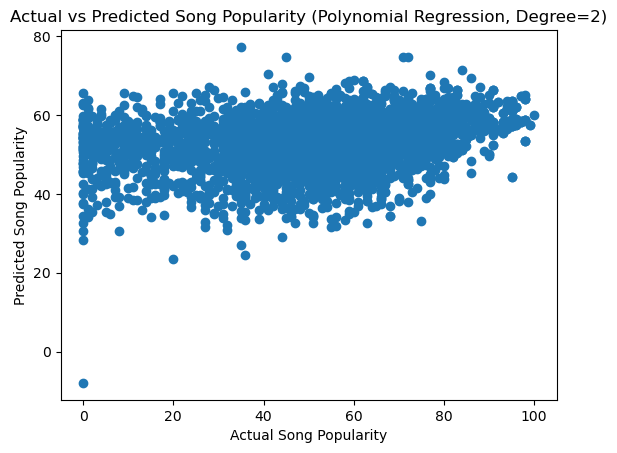

In [27]:
# Use PolynomialFeatures to create polynomial features
degree = 2  
poly = PolynomialFeatures(degree=degree)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)

# Create and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(train_data_poly, train_label)

# Make predictions on the test set
predictions = poly_model.predict(test_data_poly)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_label, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')
RMSE_Dictionary['Polynomial'] = rmse

# Plot actual vs predicted values
plt.scatter(test_label, predictions)
plt.xlabel('Actual Song Popularity')
plt.ylabel('Predicted Song Popularity')
plt.title(f'Actual vs Predicted Song Popularity (Polynomial Regression, Degree={degree})')
plt.show()

In [9]:
# Elastic Net Regression Model
from sklearn.linear_model import ElasticNet

Root Mean Squared Error (RMSE): 21.8056730587251


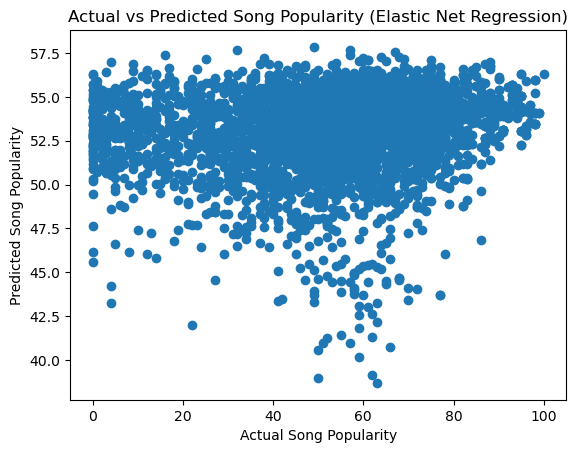

In [10]:
# Create and train the Elastic Net regression model
alpha = 0.5 
l1_ratio = 0.5  
elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net_model.fit(train_data, train_label)

# Make predictions on the test set
predictions = elastic_net_model.predict(test_data)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_label, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')
RMSE_Dictionary['Elastic'] = rmse

# Plot actual vs predicted values
plt.scatter(test_label, predictions)
plt.xlabel('Actual Song Popularity')
plt.ylabel('Predicted Song Popularity')
plt.title('Actual vs Predicted Song Popularity (Elastic Net Regression)')
plt.show()

In [11]:
# Stochastic Gradient Descent Regression
from sklearn.linear_model import SGDRegressor

Root Mean Squared Error (RMSE): 1.626659815428408e+18


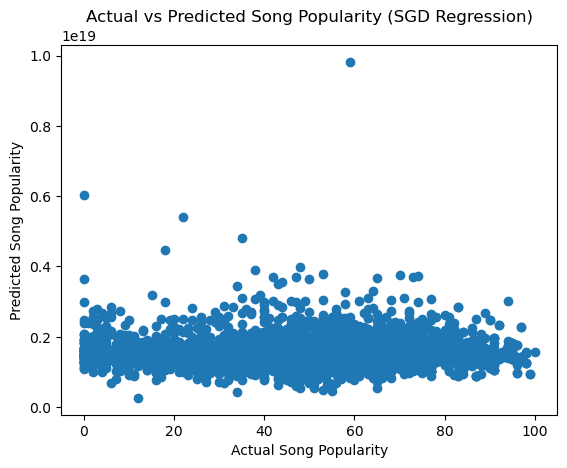

In [12]:
# Create and train the Stochastic Gradient Descent Regression model
sgd_model = SGDRegressor(max_iter=10000, alpha=0.0001, random_state=42)
sgd_model.fit(train_data, train_label)

# Make predictions on the test set
predictions = sgd_model.predict(test_data)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_label, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot actual vs predicted values
plt.scatter(test_label, predictions)
plt.xlabel('Actual Song Popularity')
plt.ylabel('Predicted Song Popularity')
plt.title('Actual vs Predicted Song Popularity (SGD Regression)')
plt.show()

In [13]:
# Bayesian Ridge Model
from sklearn.linear_model import BayesianRidge

Root Mean Squared Error (RMSE): 21.484414508480995


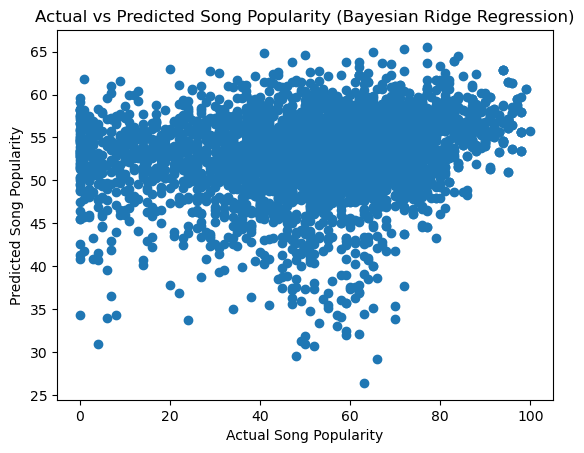

In [14]:
# Create and train the Bayesian Ridge Regression model
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(train_data, train_label)

# Make predictions on the test set
predictions = bayesian_ridge_model.predict(test_data)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_label, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')
RMSE_Dictionary['Baysian'] = rmse

# Plot actual vs predicted values
plt.scatter(test_label, predictions)
plt.xlabel('Actual Song Popularity')
plt.ylabel('Predicted Song Popularity')
plt.title('Actual vs Predicted Song Popularity (Bayesian Ridge Regression)')
plt.show()

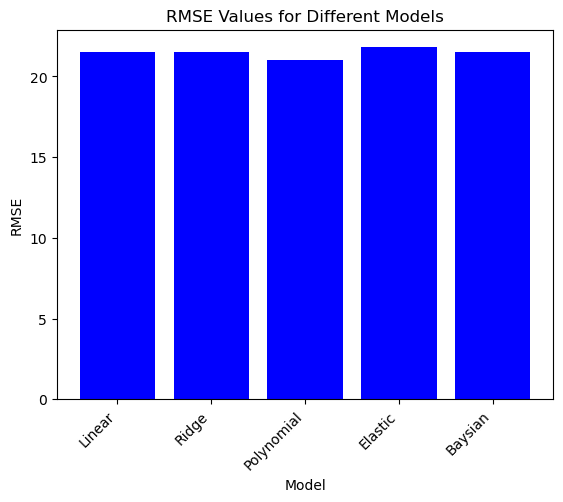

In [15]:
# Plot all RMSE Values for Regression Models
models = list(RMSE_Dictionary.keys())
rmse_values = list(RMSE_Dictionary.values())

plt.bar(models, rmse_values, color='blue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Values for Different Models')
plt.xticks(rotation=45, ha='right')
plt.show()

Degree 1: Root Mean Squared Error (RMSE): 21.485761032361786


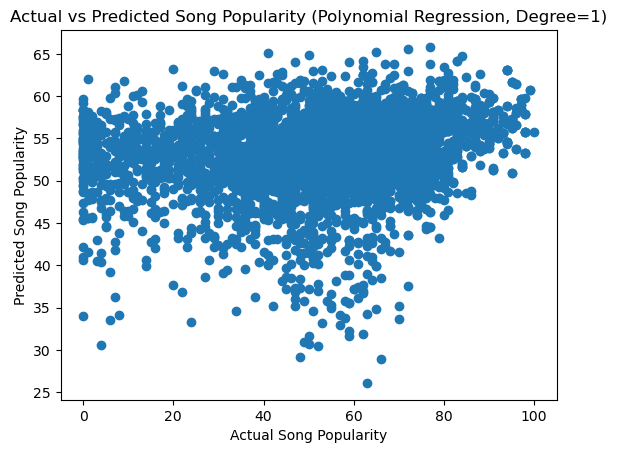

Degree 2: Root Mean Squared Error (RMSE): 21.044685309481604


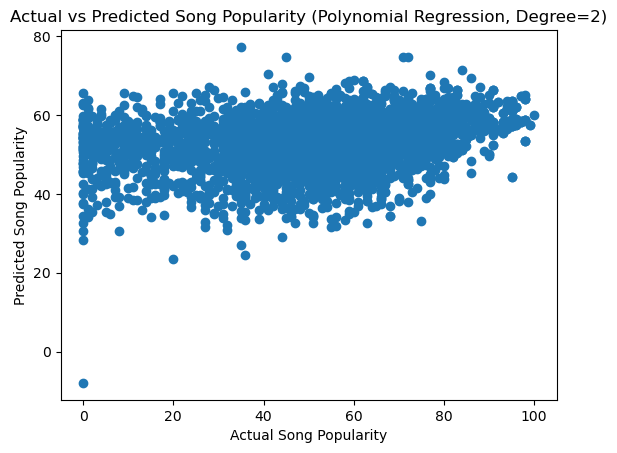

Degree 3: Root Mean Squared Error (RMSE): 21.159144035878512


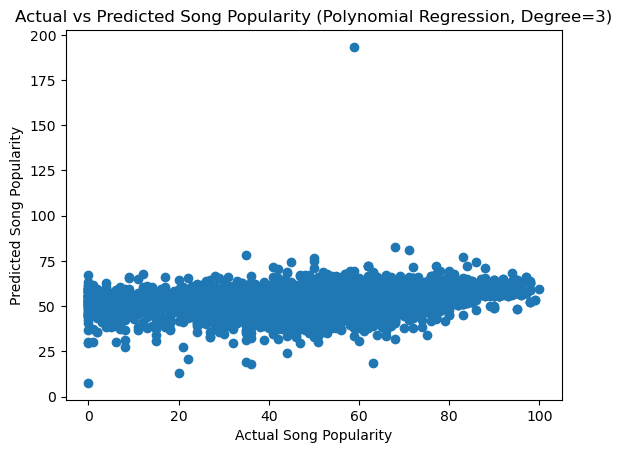

Degree 4: Root Mean Squared Error (RMSE): 21.213548884936632


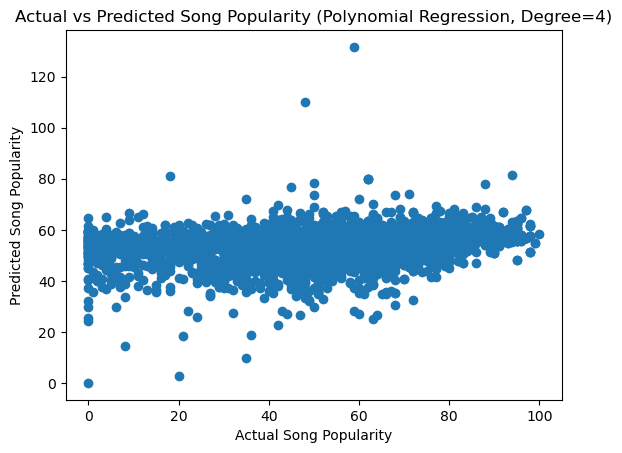

Degree 5: Root Mean Squared Error (RMSE): 53.29089848736165


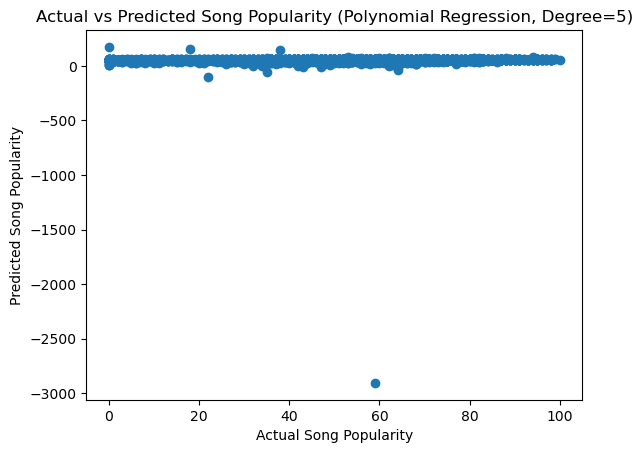

In [33]:
# Tuning Polynomial Regression Model
degree_range = range(1, 6)  # Adjust the range as needed

# Lists to store degrees and corresponding RMSE values
degrees = []
rmse_values = []

for degree in degree_range:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    train_data_poly = poly.fit_transform(train_data)
    test_data_poly = poly.transform(test_data)

    # Create and train the polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(train_data_poly, train_label)

    # Make predictions on the test set
    predictions = poly_model.predict(test_data_poly)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_label, predictions))
    print(f'Degree {degree}: Root Mean Squared Error (RMSE): {rmse}')

    # Store degree and corresponding RMSE value
    degrees.append(degree)
    rmse_values.append(rmse)

    # Plot actual vs predicted values
    plt.scatter(test_label, predictions)
    plt.xlabel('Actual Song Popularity')
    plt.ylabel('Predicted Song Popularity')
    plt.title(f'Actual vs Predicted Song Popularity (Polynomial Regression, Degree={degree})')
    plt.show()

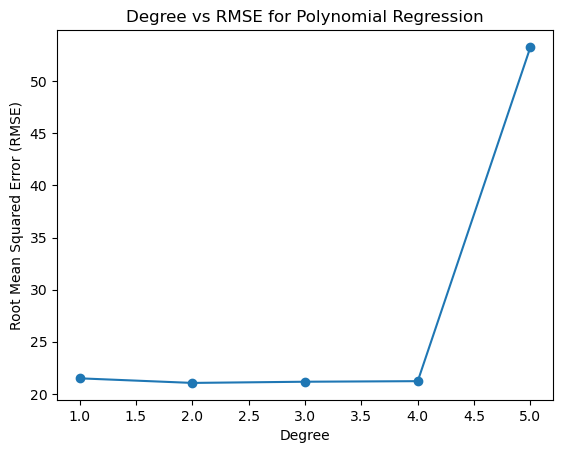

In [34]:
# Plot degree vs RMSE
plt.plot(degrees, rmse_values, marker='o')
plt.xlabel('Degree')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Degree vs RMSE for Polynomial Regression')
plt.show()

In [37]:
# Applying Cross-validation
from sklearn.model_selection import cross_val_predict, KFold

Root Mean Squared Error (RMSE) with Cross-Validation: 21.009197592913008


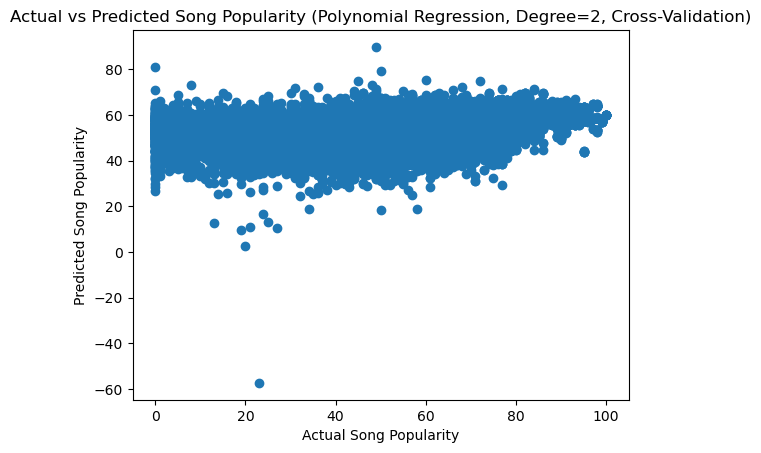

In [43]:
degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)

# Create polynomial regression model
poly_model = LinearRegression()

# Perform cross-validation
kf = KFold(n_splits=100, shuffle=True, random_state=1) 
predictions_cv = cross_val_predict(poly_model, train_data_poly, train_label, cv=kf)

# Calculate RMSE on cross-validated predictions
rmse_cv = np.sqrt(mean_squared_error(train_label, predictions_cv))
print(f'Root Mean Squared Error (RMSE) with Cross-Validation: {rmse_cv}')

# Plot actual vs predicted values
plt.scatter(train_label, predictions_cv)
plt.xlabel('Actual Song Popularity')
plt.ylabel('Predicted Song Popularity')
plt.title(f'Actual vs Predicted Song Popularity (Polynomial Regression, Degree={degree}, Cross-Validation)')
plt.show()